## Getting the necessary libraries and inserting the data into a dataframe

In [99]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
from scipy.stats import zscore
from decimal import Decimal

In [100]:
data = pd.read_csv("data.csv")
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## An initial view at the data

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           38472 non-null  object 
 1   Continent                        38472 non-null  object 
 2   Latitude                         38472 non-null  float64
 3   Longitude                        38472 non-null  float64
 4   Average temperature per year     38472 non-null  int64  
 5   Hospital beds per 1000 people    38472 non-null  float64
 6   Medical doctors per 1000 people  38472 non-null  float64
 7   GDP/Capita                       38472 non-null  float64
 8   Population                       38472 non-null  int64  
 9   Median age                       38472 non-null  int64  
 10  Population aged 65 and over (%)  38472 non-null  int64  
 11  Date                             38472 non-null  object 
 12  Daily tests       

### See the first and last instances of the dataframe

In [102]:
data.head(5)

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15000,20.17000,14,2.89000,1.29000,5353.20000,2873457,38,14,2020-02-25,8.00000,NaN,NaN
1,Albania,Europe,41.15000,20.17000,14,2.89000,1.29000,5353.20000,2873457,38,14,2020-02-26,5.00000,NaN,NaN
2,Albania,Europe,41.15000,20.17000,14,2.89000,1.29000,5353.20000,2873457,38,14,2020-02-27,4.00000,NaN,NaN
3,Albania,Europe,41.15000,20.17000,14,2.89000,1.29000,5353.20000,2873457,38,14,2020-02-28,1.00000,NaN,NaN
4,Albania,Europe,41.15000,20.17000,14,2.89000,1.29000,5353.20000,2873457,38,14,2020-02-29,8.00000,NaN,NaN


In [103]:
data.tail(5)

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
38467,Zimbabwe,Africa,-19.02000,29.15000,20,1.70000,0.08000,1464.00000,16529904,19,3,2021-02-24,1804.00000,35960.00000,1456.00000
38468,Zimbabwe,Africa,-19.02000,29.15000,20,1.70000,0.08000,1464.00000,16529904,19,3,2021-02-25,2965.00000,35994.00000,1458.00000
38469,Zimbabwe,Africa,-19.02000,29.15000,20,1.70000,0.08000,1464.00000,16529904,19,3,2021-02-26,NaN,36044.00000,1463.00000
38470,Zimbabwe,Africa,-19.02000,29.15000,20,1.70000,0.08000,1464.00000,16529904,19,3,2021-02-27,NaN,36058.00000,1463.00000
38471,Zimbabwe,Africa,-19.02000,29.15000,20,1.70000,0.08000,1464.00000,16529904,19,3,2021-02-28,NaN,36089.00000,1463.00000


# Data preparation

## Fill the empty values

In [104]:
#We full every lacking value at Daily tests,Cases and Deaths we the value 0.
#We don't delete any row in order not to lose any data, as every row is important to have in order to locate
#the daily progress of the disease.
data=data.fillna(0)
                    

## Change the dataframes to be easier to handle

We have noticed that for every country, most columns has the same information, so we chose to reduce them into an new dataframe with each country having only one index.

In [105]:


countries_stats= data.drop_duplicates(ignore_index=True, subset=['Entity', 'Average temperature per year', 'Hospital beds per 1000 people',
       'Medical doctors per 1000 people', 'GDP/Capita', 'Population',
       'Median age', 'Population aged 65 and over (%)'])

countries_stats=countries_stats.drop(['Date', 'Daily tests','Cases', 'Deaths'],axis=1)
countries_stats=countries_stats.rename(columns={"Entity":"Country"})
countries_stats.set_index('Country')


,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%)
Country,,,,,,,,,,
Albania,Europe,41.15000,20.17000,14,2.89000,1.29000,5353.20000,2873457,38,14
Algeria,Africa,28.03000,1.66000,25,1.90000,1.83000,3974.00000,41318142,29,6
Argentina,South America,-38.42000,-63.62000,14,5.00000,3.91000,9912.30000,44271041,31,11
Armenia,Europe,40.07000,45.04000,11,4.20000,2.80000,4622.70000,2930450,35,11
Australia,Oceania,-25.27000,133.78000,22,3.84000,3.50000,55060.30000,24598933,37,16
Austria,Europe,47.52000,14.55000,8,7.37000,5.23000,50137.70000,8809212,44,19
Bahrain,Asia,25.93000,50.64000,27,2.00000,0.92000,23504.00000,1492584,32,2
Bangladesh,Asia,23.68000,90.36000,25,0.80000,0.47000,1855.70000,164669751,27,5
Belarus,Europe,53.71000,27.95000,8,11.00000,4.07000,6663.30000,9507875,40,15


In [106]:
countries_stats= countries_stats.drop(['Latitude','Longitude','Continent'],axis=1)

In [107]:
data_days_stats={}
for country in countries_stats['Country']:
    single_country=data.loc[data['Entity']==country]
    single_country=single_country[['Date','Daily tests','Cases','Deaths']]
    single_country=single_country.set_index("Date")
    data_days_stats[country]=  single_country

In [108]:
data_days_stats['Albania'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 2020-02-25 to 2021-02-28
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Daily tests  370 non-null    float64
 1   Cases        370 non-null    float64
 2   Deaths       370 non-null    float64
dtypes: float64(3)
memory usage: 11.6+ KB


In [109]:
for country in data_days_stats.values():
    country["Daily cases"]=country['Cases'].diff(1)
    country["Daily deaths"]=country['Deaths'].diff(1)
   

In [110]:
for country,dataframes in data_days_stats.items():    
    data_days_stats[country]=dataframes.fillna(0)
    print(country,data_days_stats[country].describe())

Albania        Daily tests        Cases     Deaths  Daily cases  Daily deaths
count    370.00000    370.00000  370.00000    370.00000     370.00000
mean    1170.26486  22774.27568  464.57297    289.64054       4.85405
std     1197.95253  29178.28787  514.30035    334.34597       5.13454
min        0.00000      0.00000    0.00000      0.00000       0.00000
25%      252.00000   1056.50000   33.00000     23.00000       1.00000
50%      808.50000   9139.00000  268.50000    132.50000       3.50000
75%     1903.25000  36653.75000  783.00000    536.50000       7.00000
max     4562.00000 107167.00000 1796.00000   1239.00000      21.00000
Algeria        Daily tests        Cases     Deaths  Daily cases  Daily deaths
count    370.00000    370.00000  370.00000    370.00000     370.00000
mean       8.37838  45655.01892 1480.65676    305.65135       8.06216
std      131.94426  38532.81875  966.70956    245.12528       5.07280
min        0.00000      1.00000    0.00000      0.00000       0.00000
25% 

[Text(0.5, 1.0, 'Poland')]

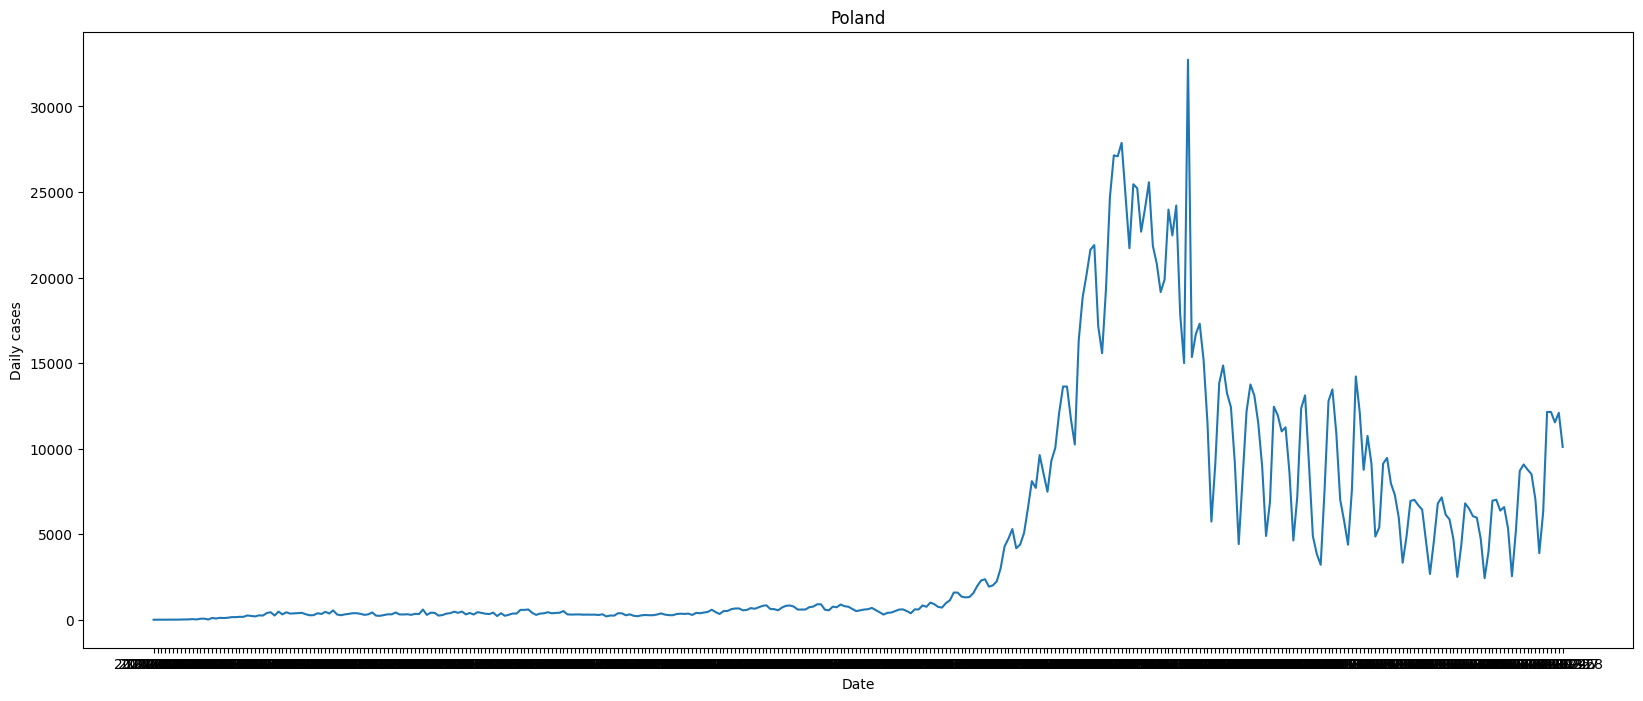

In [111]:
fig, axes = plt.subplots(figsize=(20, 8) )
country,dataframes = rnd.choice(list(data_days_stats.items()))
sns.lineplot(data=dataframes,x=dataframes.index,y='Daily cases').set(title=country)
 

In [112]:
print(data_days_stats['Malta'].head(20))
print(data_days_stats['Malta'].tail(20))

            Daily tests    Cases  Deaths  Daily cases  Daily deaths
Date                                                               
2020-02-25     29.00000  0.00000 0.00000      0.00000       0.00000
2020-02-26     50.00000  0.00000 0.00000      0.00000       0.00000
2020-02-27     14.00000  0.00000 0.00000      0.00000       0.00000
2020-02-28     10.00000  0.00000 0.00000      0.00000       0.00000
2020-02-29      7.00000  0.00000 0.00000      0.00000       0.00000
2020-03-01      8.00000  0.00000 0.00000      0.00000       0.00000
2020-03-02      5.00000  0.00000 0.00000      0.00000       0.00000
2020-03-03     22.00000  0.00000 0.00000      0.00000       0.00000
2020-03-04     42.00000  0.00000 0.00000      0.00000       0.00000
2020-03-05     31.00000  0.00000 0.00000      0.00000       0.00000
2020-03-06     63.00000  0.00000 0.00000      0.00000       0.00000
2020-03-07     98.00000  3.00000 0.00000      3.00000       0.00000
2020-03-08    118.00000  3.00000 0.00000      0.

In [113]:
mean_daily_tests=[]
mean_daily_cases=[]
mean_daily_deaths=[]
for dataframes in data_days_stats.values():
    mean_daily_tests.append(dataframes["Daily tests"].mean())
    mean_daily_cases.append(dataframes['Daily cases'].loc[dataframes["Cases"]>10].mean())
    mean_daily_deaths.append(dataframes['Daily deaths'].loc[dataframes["Cases"]>10].mean())                                                         

In [114]:
countries_stats['Mean daily tests']=mean_daily_tests
countries_stats['Mean daily cases']=mean_daily_cases
countries_stats['Mean daily deaths']=mean_daily_deaths



In [115]:
countries_stats.head(10)

,Country,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Mean daily tests,Mean daily cases,Mean daily deaths
0,Albania,14,2.89000,1.29000,5353.20000,2873457,38,14,1170.26486,301.85070,5.05915
1,Algeria,25,1.90000,1.83000,3974.00000,41318142,29,6,8.37838,312.39503,8.24033
2,Argentina,14,5.00000,3.91000,9912.30000,44271041,31,11,15085.97772,5886.47207,145.15363
3,Armenia,11,4.20000,2.80000,4622.70000,2930450,35,11,273.03562,488.77841,9.06818
4,Australia,22,3.84000,3.50000,55060.30000,24598933,37,16,23341.35250,73.52538,2.30711
5,Austria,8,7.37000,5.23000,50137.70000,8809212,44,19,38566.58108,1258.71507,23.45479
6,Bahrain,27,2.00000,0.92000,23504.00000,1492584,32,2,6934.72507,330.79189,1.21351
7,Bangladesh,25,0.80000,0.47000,1855.70000,164669751,27,5,11050.57182,1569.55747,24.16092
8,Belarus,8,11.00000,4.07000,6663.30000,9507875,40,15,1292.04632,811.57345,5.58192
9,Belgium,10,5.64000,3.01000,46420.70000,11372068,41,19,23893.75959,2125.35262,60.81818


In [116]:
countries_stats[['Mean daily tests']]=countries_stats[['Mean daily tests']].apply(lambda  x:round(x))

In [117]:
#pd.options.display.max_rows=20
#countries_stats.sort_values(by=['Mean daily deaths'],ascending=False)

In [118]:
total_tests=[]
for dataframe in data_days_stats.values():
    total_tests.append(dataframe['Daily tests'].sum())
    
countries_stats['Total tests']= total_tests
countries_stats['Total tests per total population percentage (%)']=countries_stats['Total tests']/countries_stats['Population']*100
countries_stats['Total tests per one thousand people']=countries_stats['Total tests']/countries_stats['Population']*1000

In [119]:
total_cases=[]
total_deaths=[]
for dataframe in data_days_stats.values():
    total_cases.append(dataframe.loc['2021-02-28','Cases'])
  
    
countries_stats['Total cases']= total_cases  
countries_stats['Covid cases per total population percentage (%)']=countries_stats['Total cases']/countries_stats['Population']*100
countries_stats['Covid cases per one thousand people']=countries_stats['Total cases']/countries_stats['Population']*1000



In [120]:
total_deaths=[]
for dataframe in data_days_stats.values():
   
    total_deaths.append(dataframe.loc['2021-02-28','Deaths'])
    

countries_stats['Total deaths']= total_deaths  
countries_stats['Total deaths per total population percentage (%)']=countries_stats['Total deaths']/countries_stats['Population']*100
countries_stats['Total deaths per one thousand people']=countries_stats['Total deaths']/countries_stats['Population']*1000

In [121]:
countries_stats['Covid mortality (%)']=countries_stats['Total deaths']/countries_stats['Total cases']*100
countries_stats['Covid mortality per one thousand people']=countries_stats['Total deaths']/countries_stats['Total cases']*1000


In [122]:
countries_stats['Covid tests to cases ratio']=countries_stats['Total tests']/countries_stats['Total cases']

In [125]:
pd.set_option('display.max_rows', 365)
pd.set_option('display.max_columns', 365)


In [127]:
countries_stats.head()

,Country,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Mean daily tests,Mean daily cases,Mean daily deaths,Total tests,Total tests per total population percentage (%),Total tests per one thousand people,Total cases,Covid cases per total population percentage (%),Covid cases per one thousand people,Total deaths,Total deaths per total population percentage (%),Total deaths per one thousand people,Covid mortality (%),Covid mortality per one thousand people,Covid tests to cases ratio
0,Albania,14,2.89000,1.29000,5353.20000,2873457,38,14,1170.00000,301.85070,5.05915,432998.00000,15.06889,150.68887,107167.00000,3.72955,37.29549,1796.00000,0.06250,0.62503,1.67589,16.75889,4.04040
1,Algeria,25,1.90000,1.83000,3974.00000,41318142,29,6,8.00000,312.39503,8.24033,3100.00000,0.00750,0.07503,113092.00000,0.27371,2.73710,2983.00000,0.00722,0.07220,2.63768,26.37676,0.02741
2,Argentina,14,5.00000,3.91000,9912.30000,44271041,31,11,15086.00000,5886.47207,145.15363,6094735.00000,13.76687,137.66866,2107365.00000,4.76014,47.60143,51965.00000,0.11738,1.17379,2.46588,24.65876,2.89211
3,Armenia,11,4.20000,2.80000,4622.70000,2930450,35,11,273.00000,488.77841,9.06818,99658.00000,3.40077,34.00775,172058.00000,5.87138,58.71385,3192.00000,0.10893,1.08925,1.85519,18.55188,0.57921
4,Australia,22,3.84000,3.50000,55060.30000,24598933,37,16,23341.00000,73.52538,2.30711,9336541.00000,37.95506,379.55065,28978.00000,0.11780,1.17802,909.00000,0.00370,0.03695,3.13686,31.36862,322.19411


In [128]:
sns.set_style('whitegrid')


In [131]:
countries_stats.sort_values(by=['Covid mortality per one thousand people','Covid tests to cases ratio'])

,Country,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Mean daily tests,Mean daily cases,Mean daily deaths,Total tests,Total tests per total population percentage (%),Total tests per one thousand people,Total cases,Covid cases per total population percentage (%),Covid cases per one thousand people,Total deaths,Total deaths per total population percentage (%),Total deaths per one thousand people,Covid mortality (%),Covid mortality per one thousand people,Covid tests to cases ratio
59,Mongolia,2,7.00000,3.26000,4339.80000,3075647,28,4,4521.00000,8.65294,0.00588,1609563.00000,52.33250,523.32501,2952.00000,0.09598,0.95980,2.00000,0.00007,0.00065,0.06775,0.67751,545.24492
10,Bhutan,13,1.70000,0.38000,3316.20000,807610,28,6,1411.00000,2.92833,0.00341,508007.00000,62.90251,629.02515,867.00000,0.10735,1.07354,1.00000,0.00012,0.00124,0.11534,1.15340,585.93656
76,Qatar,28,1.20000,1.96000,62088.10000,2639211,31,1,4013.00000,457.13966,0.72067,1468729.00000,55.65031,556.50306,163664.00000,6.20125,62.01247,258.00000,0.00978,0.09776,0.15764,1.57640,8.97405
97,United Arab Emirates,29,1.20000,1.56000,43103.30000,9400145,34,1,76207.00000,1049.63807,3.27346,30254113.00000,321.84730,3218.47301,391524.00000,4.16508,41.65085,1221.00000,0.01299,0.12989,0.31186,3.11858,77.27269
90,Thailand,27,2.10000,0.47000,7806.70000,69037513,40,12,6370.00000,65.38442,0.20854,2681565.00000,3.88421,38.84214,26031.00000,0.03771,0.37706,83.00000,0.00012,0.00120,0.31885,3.18851,103.01429
6,Bahrain,27,2.00000,0.92000,23504.00000,1492584,32,2,6935.00000,330.79189,1.21351,2572783.00000,172.37107,1723.71069,122394.00000,8.20014,82.00141,449.00000,0.03008,0.30082,0.36685,3.66848,21.02050
55,Malaysia,26,1.90000,1.53000,11414.20000,31624264,29,7,14792.00000,771.13333,2.89744,5931601.00000,18.75649,187.56487,300752.00000,0.95102,9.51017,1130.00000,0.00357,0.03573,0.37572,3.75725,19.72257
35,Iceland,2,2.91000,3.79000,66944.80000,341284,37,15,753.00000,16.64738,0.07989,277025.00000,81.17140,811.71400,6049.00000,1.77242,17.72424,29.00000,0.00850,0.08497,0.47942,4.79418,45.79683
87,Sri Lanka,28,3.60000,0.88000,3853.10000,21444000,34,10,5213.00000,236.70655,1.32194,2079872.00000,9.69909,96.99086,83094.00000,0.38749,3.87493,464.00000,0.00216,0.02164,0.55840,5.58404,25.03035
48,Kuwait,27,2.00000,2.61000,32000.40000,4136528,33,3,4144.00000,515.81351,2.92703,1537536.00000,37.16972,371.69723,190852.00000,4.61382,46.13821,1083.00000,0.02618,0.26181,0.56746,5.67455,8.05617


<Axes: xlabel='Total tests per total population percentage (%)', ylabel='Covid cases per total population percentage (%)'>

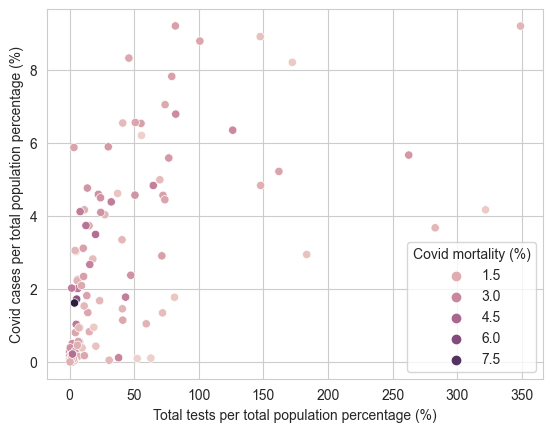

In [ ]:
x_column='Covid tests to cases ratio'
y_column='Covid cases per total population percentage (%)'
plot_data=countries_stats
#plot_data=countries_stats.drop(plot_data[x_column].idxmax())
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data
sns.scatterplot(data=plot_data,x=x_column,y=y_column,hue='Covid mortality (%)')

In [ ]:
x_column='Covid positivity of test cases (%)'
y_column='Covid mortality (%)'
plot_data=countries_stats
plot_data=plot_data.drop(plot_data[x_column].idxmax()) #Use this to cut any big outlier
plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data
sns.scatterplot(data=plot_data,x=x_column,y=y_column,hue='Covid cases per total population percentage (%)')

KeyError: 'Covid positivity of test cases (%)'

<Axes: xlabel='Median age', ylabel='Covid mortality (%)'>

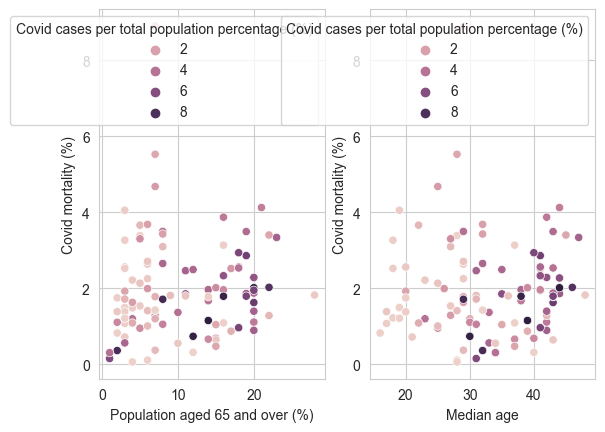

In [ ]:
fig, axis =plt.subplots(1,2)
x_column='Population aged 65 and over (%)'
y_column='Covid mortality (%)'
plot_data=countries_stats
#plot_data=countries_stats.drop(countries_stats[x_column].idxmax())
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data
sns.scatterplot(data=plot_data,x=x_column,y=y_column,color='red',hue='Covid cases per total population percentage (%)',ax=axis[0])

x_column='Median age'
y_column='Covid mortality (%)'
plot_data=countries_stats
#plot_data=countries_stats.drop(countries_stats[x_column].idxmax())
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data
sns.scatterplot(data=plot_data,x=x_column,y=y_column,color='red',hue='Covid cases per total population percentage (%)',ax=axis[1])

<Axes: xlabel='Average temperature per year', ylabel='Covid mortality (%)'>

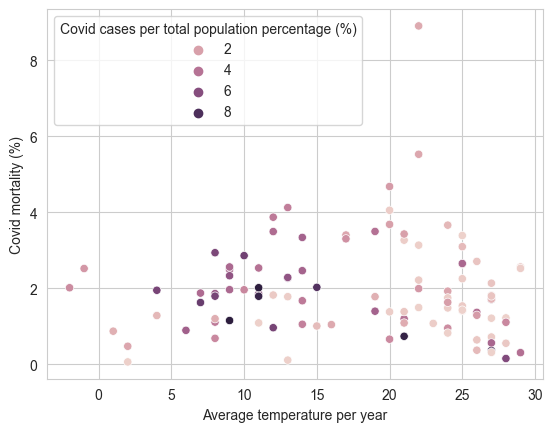

In [ ]:
x_column='Average temperature per year'
y_column='Covid mortality (%)'
plot_data=countries_stats
#plot_data=countries_stats.drop(countries_stats[x_column].idxmax())
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data
sns.scatterplot(data=plot_data,x=x_column,y=y_column,color='red',hue='Covid cases per total population percentage (%)')

<Axes: xlabel='Total tests per total population percentage (%)', ylabel='Covid mortality (%)'>

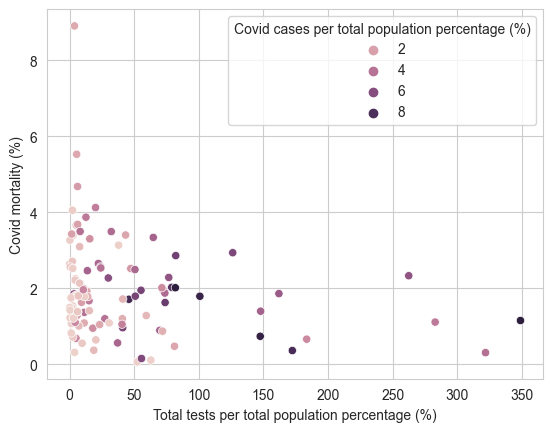

In [ ]:
x_column='Total tests per total population percentage (%)'
y_column='Covid mortality (%)'
plot_data=countries_stats
#plot_data=plot_data.drop(plot_data[x_column].idxmax())
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data
sns.scatterplot(data=plot_data,x=x_column,y=y_column,color='blue',hue='Covid cases per total population percentage (%)')

<Axes: xlabel='GDP/Capita', ylabel='Covid mortality (%)'>

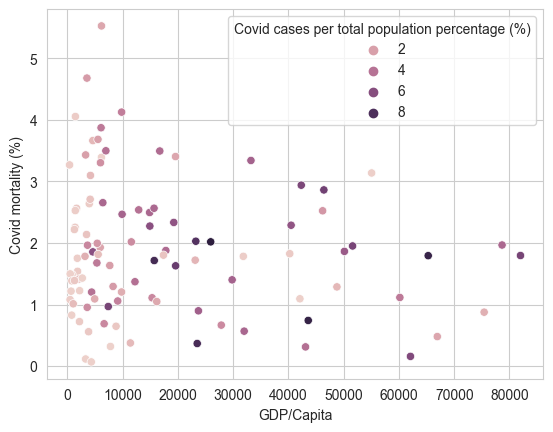

In [ ]:
x_column='GDP/Capita'
y_column='Covid mortality (%)'
plot_data=countries_stats
plot_data=plot_data.drop(plot_data[x_column].idxmax())
plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data
sns.scatterplot(data=plot_data,x=x_column,y=y_column,color='red',hue='Covid cases per total population percentage (%)')

<Axes: xlabel='Population', ylabel='Covid mortality (%)'>

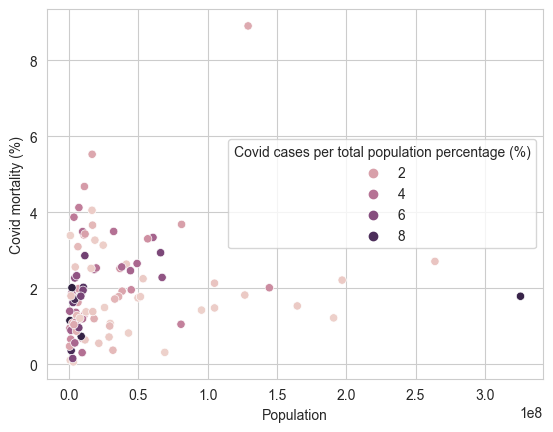

In [ ]:
x_column='Population'
y_column='Covid mortality (%)'
plot_data=countries_stats
plot_data=plot_data.drop(plot_data[x_column].idxmax())
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data
sns.scatterplot(data=plot_data,x=x_column,y=y_column,color='red',hue='Covid cases per total population percentage (%)')

<Axes: xlabel='Medical doctors per 1000 people', ylabel='Covid mortality (%)'>

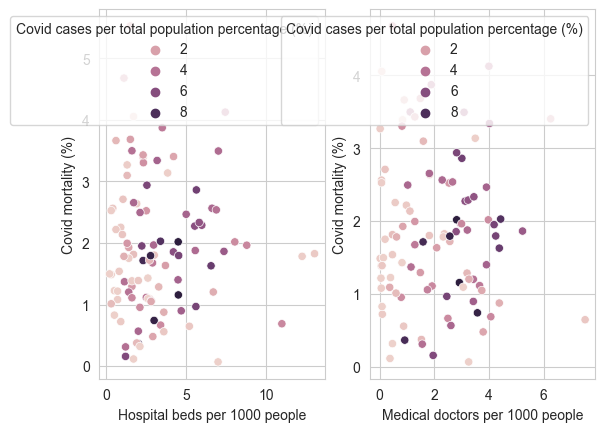

In [ ]:
fig, axis =plt.subplots(1,2)
x_column='Hospital beds per 1000 people'
y_column='Covid mortality (%)'
#plot_data=countries_stats.drop(countries_stats[x_column].idxmax())
plot_data=plot_data.drop(plot_data[y_column].idxmax())
sns.scatterplot(data=plot_data,x=x_column,y=y_column,color='red',hue='Covid cases per total population percentage (%)',ax=axis[0])

x_column='Medical doctors per 1000 people'
y_column='Covid mortality (%)'
#plot_data=countries_stats.drop(countries_stats[x_column].idxmax())
plot_data=plot_data.drop(plot_data[y_column].idxmax())
sns.scatterplot(data=plot_data,x=x_column,y=y_column,color='red',hue='Covid cases per total population percentage (%)',ax=axis[1])

<Axes: xlabel='GDP/Capita', ylabel='Total deaths per total population percentage (%)'>

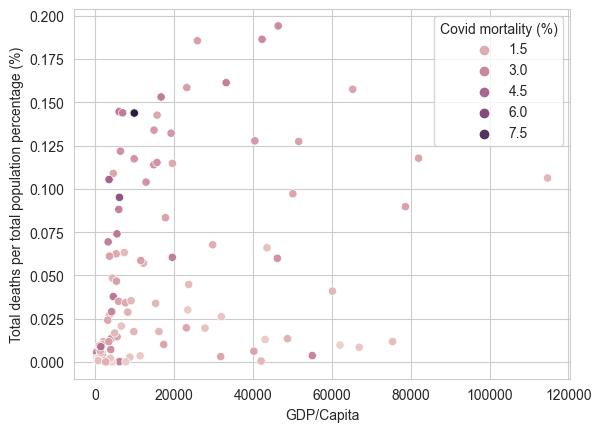

In [ ]:
x_column='GDP/Capita'
y_column='Total deaths per total population percentage (%)'
plot_data=countries_stats
#plot_data=plot_data.drop(plot_data[x_column].idxmax())
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) 
sns.scatterplot(data=plot_data,x=x_column,y=y_column,hue='Covid mortality (%)')

In [ ]:
countries_stats.sort_values(by=['Hospital beds per 1000 people'],ignore_index=True,ascending=False).head(105)

,Country,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Mean daily tests,Total cases,Total deaths,Total tests,Total deaths per total population percentage (%),Total tests per total population percentage (%),Covid cases per total population percentage (%),Covid positivity of test cases (%),Covid mortality (%)
0,Japan,Asia,36.20,138.25,12,13.05,2.37,40246.9,126785797,48,28,18880.0,432090.0,7889.0,7627688.0,0.006222,6.016201,0.340803,5.664757,1.825777
1,South Korea,Asia,35.91,127.77,13,12.27,2.33,31846.2,51466201,43,14,14574.0,90031.0,1605.0,5887719.0,0.003119,11.439972,0.174932,1.529132,1.782719
2,Belarus,Europe,53.71,27.95,8,11.00,4.07,6663.3,9507875,40,15,1292.0,287306.0,1976.0,474181.0,0.020783,4.987245,3.021769,60.589944,0.687768
3,Ukraine,Europe,48.38,31.17,10,8.80,3.00,3659.0,44831159,41,16,13103.0,1395528.0,27404.0,4756558.0,0.061127,10.609938,3.112853,29.339030,1.963701
4,Russia,Asia,61.52,105.32,-2,8.05,3.98,11585.0,144495044,39,15,261193.0,4198400.0,84700.0,103171283.0,0.058618,71.401261,2.905567,4.069349,2.017435
5,Bulgaria,Europe,42.73,25.49,13,7.45,4.00,9828.1,7075991,44,21,3973.0,247038.0,10191.0,1422194.0,0.144022,20.098867,3.491214,17.370204,4.125276
6,Austria,Europe,47.52,14.55,8,7.37,5.23,50137.7,8809212,44,19,38567.0,459440.0,8561.0,14269635.0,0.097182,161.985374,5.215449,3.219704,1.863355
7,Hungary,Europe,47.16,19.50,12,7.02,3.09,16731.8,9781127,43,19,8713.0,428599.0,14974.0,3154062.0,0.153091,32.246407,4.381898,13.588794,3.493709
8,Mongolia,Asia,46.86,103.85,2,7.00,3.26,4339.8,3075647,28,4,4521.0,2952.0,2.0,1609563.0,0.000065,52.332501,0.095980,0.183404,0.067751
9,Romania,Europe,45.94,24.97,11,6.89,2.67,12919.5,19586539,43,18,12824.0,801994.0,20350.0,4732128.0,0.103898,24.160103,4.094618,16.947851,2.537425


# Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import NearestNeighbors 
from sklearn.decomposition import PCA

from psynlig import pca_explained_variance_bar

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
numberOfclusters=7

kmeans = KMeans(n_clusters=numberOfclusters)

In [ ]:

y = kmeans.fit_predict(countries_stats[['Covid cases per total population percentage (%)', 'Covid mortality (%)']])

C:\Users\Andreas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:

countries_stats['Cluster'] = y

In [ ]:
countries_stats_sorted.head(50)

,Country,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,...,Total cases,Total deaths,Total tests,Total deaths per total population percentage (%),Total tests per total population percentage (%),Covid cases per total population percentage (%),Covid positivity of test cases (%),Covid mortality (%),Cluster,Scale of success
28,Fiji,Oceania,-16.58,179.41,25,2.30,0.84,6175.9,905502,28,...,59.0,2.0,23998.0,0.000221,2.650243,0.006516,0.245854,3.389831,9,-2.817628
101,Vietnam,Asia,14.06,108.28,25,2.60,0.82,2715.3,95540800,32,...,2448.0,35.0,333691.0,0.000037,0.349265,0.002562,0.733613,1.429739,5,-2.787901
65,New Zealand,Oceania,-40.90,174.89,11,2.61,3.06,42084.4,4793900,37,...,2378.0,26.0,1469444.0,0.000542,30.652371,0.049605,0.161830,1.093356,7,-2.735085
90,Thailand,Asia,15.87,100.99,27,2.10,0.47,7806.7,69037513,40,...,26031.0,83.0,2681565.0,0.000120,3.884214,0.037706,0.970739,0.318851,2,-2.733674
53,Madagascar,Africa,-18.77,46.87,22,0.20,0.14,523.4,25570895,19,...,19831.0,297.0,28934.0,0.001161,0.113152,0.077553,68.538743,1.497655,5,-2.714088
66,Nigeria,Africa,9.08,8.68,28,0.50,0.40,2229.9,190886311,18,...,155657.0,1907.0,702055.0,0.000999,0.367787,0.081544,22.171625,1.225130,0,-2.705415
4,Australia,Oceania,-25.27,133.78,22,3.84,3.50,55060.3,24598933,37,...,28978.0,909.0,9336541.0,0.003695,37.955065,0.117802,0.310372,3.136862,6,-2.702012
91,Togo,Africa,8.62,0.82,27,0.70,0.05,679.3,7797694,19,...,6901.0,84.0,233786.0,0.001077,2.998143,0.088501,2.951845,1.217215,1,-2.698324
95,Uganda,Africa,1.37,32.29,24,0.50,0.09,794.3,42862958,16,...,40357.0,334.0,544668.0,0.000779,1.270720,0.094154,7.409468,0.827614,9,-2.685977
59,Mongolia,Asia,46.86,103.85,2,7.00,3.26,4339.8,3075647,28,...,2952.0,2.0,1609563.0,0.000065,52.332501,0.095980,0.183404,0.067751,2,-2.671094


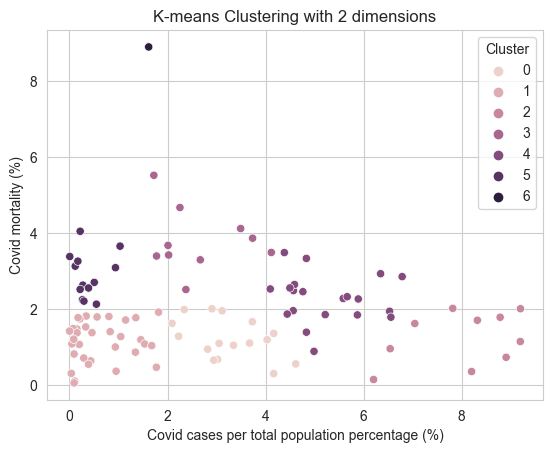

In [ ]:

sns.scatterplot(x="Covid cases per total population percentage (%)", y="Covid mortality (%)", hue=countries_stats['Cluster'], data=countries_stats)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
for i in range(numberOfclusters):
    print('Those countries are contained in cluster ',i)
    print(countries_stats[countries_stats['Cluster']==i])

Those countries are contained in cluster  0
                 Country      Continent  Latitude  Longitude  \
0                Albania         Europe     41.15      20.17   
8                Belarus         Europe     53.71      27.95   
15            Cape Verde         Africa     16.00     -24.01   
18            Costa Rica  North America      9.75     -83.75   
21                Cyprus         Europe     35.13      33.43   
22               Denmark         Europe     56.26       9.50   
23    Dominican Republic  North America     18.74     -70.16   
45                Jordan           Asia     30.59      36.24   
48                Kuwait           Asia     29.31      47.48   
50                 Libya         Africa     26.34      17.23   
68                  Oman           Asia     21.51      55.92   
71              Paraguay  South America    -23.44     -58.44   
78                Russia           Asia     61.52     105.32   
94                Turkey           Asia     38.96      35.24

In [ ]:
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours